In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/Users/jazzopardi/Downloads/new_data.csv')

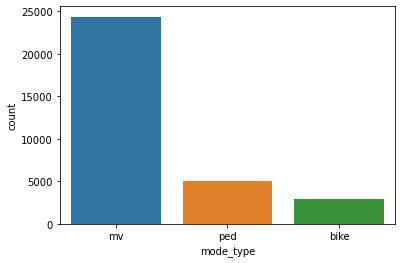

In [4]:
df['mode_type'].value_counts()

sns.countplot(x = df['mode_type'])

plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'WASHINGTON ST'),
  Text(1, 0, 'BLUE HILL AVE'),
  Text(2, 0, 'INTERSTATE 93 '),
  Text(3, 0, 'DORCHESTER AVE'),
  Text(4, 0, 'COLUMBIA RD'),
  Text(5, 0, 'MASSACHUSETTS AVE'),
  Text(6, 0, 'HYDE PARK AVE'),
  Text(7, 0, 'CENTRE ST'),
  Text(8, 0, 'COMMONWEALTH AVE'),
  Text(9, 0, 'RIVER ST')])

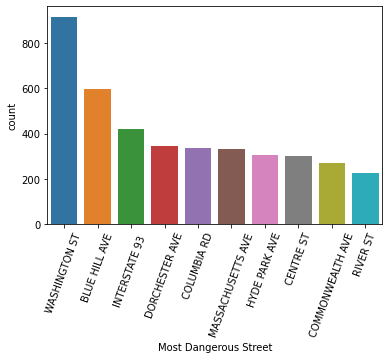

In [5]:
chart = sns.countplot(x='street',data=df,order=pd.value_counts(df['street']).iloc[:10].index)

plt.xlabel("Most Dangerous Street")
plt.xticks(rotation=70)

In [6]:
df["Streets"] = df["xstreet1"] + ' / ' + df["xstreet2"]

In [7]:
df['Streets'].value_counts()

MASSACHUSETTS AVE / MELNEA CASS BLVD    75
NEWMARKET SQ / ALLSTATE RD              61
PUMPHOUSE RD / RAMP                     58
GERARD ST / ISLAND ST                   57
CEDAR ST / COLUMBUS AVE                 57
                                        ..
DAVID ORTIZ DR / FENWAY PLZ              1
PARK DR / PARK DR                        1
BREWER ST / REGENT CIR                   1
NEPTUNE RD / CHELSEA ST                  1
LYFORD ST / STRATTON ST                  1
Name: Streets, Length: 9387, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'MASSACHUSETTS AVE / MELNEA CASS BLVD'),
  Text(1, 0, 'NEWMARKET SQ / ALLSTATE RD'),
  Text(2, 0, 'PUMPHOUSE RD / RAMP'),
  Text(3, 0, 'GERARD ST / ISLAND ST'),
  Text(4, 0, 'CEDAR ST / COLUMBUS AVE'),
  Text(5, 0, 'MASSACHUSETTS AVE / ALBANY ST'),
  Text(6, 0, 'DEAD END / DEAD END'),
  Text(7, 0, 'WILLIAM T MORRISSEY BLVD / BABE RUTH PARK DR'),
  Text(8, 0, 'MOUNT HOPE ST / CANTERBURY ST'),
  Text(9, 0, 'HARVARD ST / MORTON ST')])

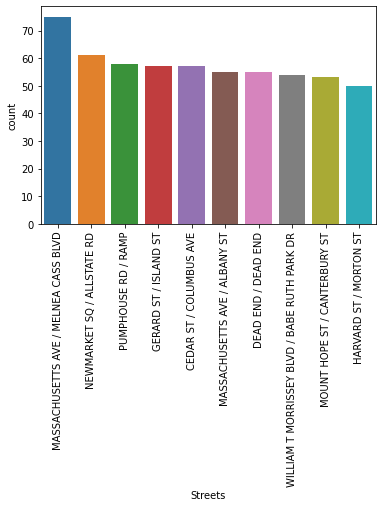

In [8]:
chart2 = sns.countplot(x='Streets',data=df,order=pd.value_counts(df['Streets']).iloc[:10].index)

plt.xlabel("Streets")
plt.xticks(rotation=90)

In [9]:
df['dispatch_ts'] = pd.to_datetime(df.dispatch_ts, format='%Y-%m-%d %H:%M:%S')

In [10]:
df['day'] = df['dispatch_ts'].dt.day
df['month'] = df['dispatch_ts'].dt.month
df['year'] = df['dispatch_ts'].dt.year

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '6'),
  Text(1, 0, '5'),
  Text(2, 0, '23'),
  Text(3, 0, '15'),
  Text(4, 0, '4'),
  Text(5, 0, '10'),
  Text(6, 0, '19'),
  Text(7, 0, '1'),
  Text(8, 0, '7'),
  Text(9, 0, '12')])

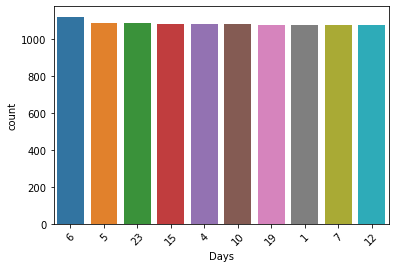

In [11]:
day = sns.countplot(x='day',data=df,order=pd.value_counts(df['day']).iloc[:10].index)

plt.xlabel("Days")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '8'),
  Text(1, 0, '10'),
  Text(2, 0, '9'),
  Text(3, 0, '7'),
  Text(4, 0, '6'),
  Text(5, 0, '5'),
  Text(6, 0, '11'),
  Text(7, 0, '12'),
  Text(8, 0, '3'),
  Text(9, 0, '4')])

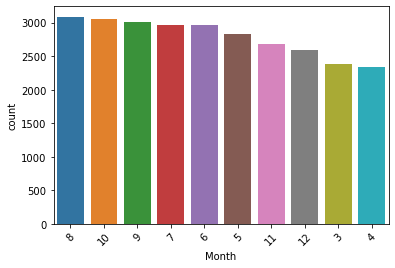

In [12]:
month = sns.countplot(x='month',data=df,order=pd.value_counts(df['month']).iloc[:10].index)

plt.xlabel("Month")
plt.xticks(rotation=45)

In [13]:
x = pd.DataFrame(df['year'].value_counts())

x = x.reset_index()

<AxesSubplot:xlabel='index', ylabel='year'>

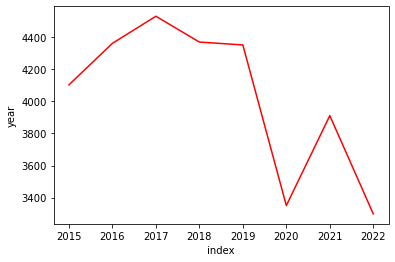

In [14]:
sns.lineplot(data = x, x = 'index', y = 'year', color = 'red')

Text(0.5, 0, 'Location')

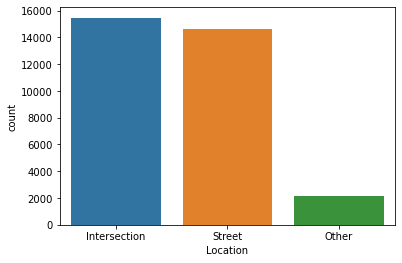

In [15]:
location = sns.countplot(x='location_type',data=df,order=pd.value_counts(df['location_type']).iloc[:10].index)
plt.xlabel("Location")

In [16]:
df_2017 = df[df['year'] == 2017]

In [17]:
df_2017['month'].value_counts()

6     441
9     437
10    436
7     417
8     409
5     383
11    374
12    373
3     347
4     323
1     316
2     275
Name: month, dtype: int64

In [18]:
plot_df_2017 = df_2017[df_2017['month'] == 6]

In [19]:
plot_df_2017['Type'] = plot_df_2017['mode_type']

/var/folders/d6/4jwz8gb57xbghy4v57qljmcm0000gn/T/ipykernel_34570/3543365476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_2017['Type'] = plot_df_2017['mode_type']


In [29]:
px.set_mapbox_access_token("pk.eyJ1IjoiamF6em9wYXJkaSIsImEiOiJjbGJ3OXRvOWEwN2h2M29saG50a3BsanMxIn0.aulu1WAqsRaCOBbE2bxJEw")
fig = px.scatter_mapbox(plot_df_2017,lat='lat',lon='long', color="Type",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.update_layout(
        title = 'Traffic Accidents Boston, 2017',
        geo_scope='usa',
    )

fig.update_geos(fitbounds="locations")

In [21]:
df['Date'] = pd.to_datetime(df['dispatch_ts']).dt.date

In [22]:
df['Date'].value_counts()

2017-03-31    27
2019-10-11    25
2021-11-13    25
2021-10-26    24
2019-06-28    24
              ..
2017-08-21     1
2020-10-10     1
2020-03-26     1
2015-02-28     1
2020-10-02     1
Name: Date, Length: 2920, dtype: int64

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
worst_day = df[df['Date'].dt.strftime('%Y-%m-%d')=="2017-03-31"]

In [25]:
worst_day['Type'] = worst_day['mode_type']

/var/folders/d6/4jwz8gb57xbghy4v57qljmcm0000gn/T/ipykernel_34570/2982812044.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
px.set_mapbox_access_token("pk.eyJ1IjoiamF6em9wYXJkaSIsImEiOiJjbGJ3OXRvOWEwN2h2M29saG50a3BsanMxIn0.aulu1WAqsRaCOBbE2bxJEw")
fig = px.scatter_mapbox(worst_day,lat='lat',lon='long', color="Type", size = 'day',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=10, zoom=10)
fig.update_layout(
        title = 'Traffic Accidents on March 31st, 2017',
        geo_scope='usa',
    )

fig.update_geos(fitbounds="locations")

In [32]:
worst_day['mode_type'].value_counts()


mv     15
ped    12
Name: mode_type, dtype: int64

In [27]:
dangerous_street = df[df['Streets'] == 'MASSACHUSETTS AVE / MELNEA CASS BLVD']

In [28]:
px.set_mapbox_access_token("pk.eyJ1IjoiamF6em9wYXJkaSIsImEiOiJjbGJ3OXRvOWEwN2h2M29saG50a3BsanMxIn0.aulu1WAqsRaCOBbE2bxJEw")
fig = px.scatter_mapbox(dangerous_street,lat='lat',lon='long', color="mode_type", size = 'year',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=10, zoom=10)
fig.update_layout(
        title = 'Traffic Accidents Boston',
        geo_scope='usa',
    )

fig.update_geos(fitbounds="locations")

In [39]:
df_2022 = df[df['year'] == 2022]

In [41]:
df_2022['Date'].value_counts()

2022-02-07    20
2022-12-16    19
2022-11-10    19
2022-11-07    18
2022-05-13    18
              ..
2022-11-25     3
2022-01-12     2
2022-05-31     2
2022-01-04     2
2022-12-29     2
Name: Date, Length: 365, dtype: int64

In [42]:
worst_day_2022 = df_2022[df_2022['Date'].dt.strftime('%Y-%m-%d')=="2022-02-07"]

In [43]:
worst_day_2022['Type'] = worst_day_2022['mode_type']

/var/folders/d6/4jwz8gb57xbghy4v57qljmcm0000gn/T/ipykernel_34570/3040284944.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
px.set_mapbox_access_token("pk.eyJ1IjoiamF6em9wYXJkaSIsImEiOiJjbGJ3OXRvOWEwN2h2M29saG50a3BsanMxIn0.aulu1WAqsRaCOBbE2bxJEw")
fig = px.scatter_mapbox(worst_day_2022,lat='lat',lon='long', color="Type", size = 'day',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=10, zoom=10)
fig.update_layout(
        title = 'Traffic Accidents on February 7th, 2022',
        geo_scope='usa',
    )

fig.update_geos(fitbounds="locations")